# Project on HealthCare data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_health.csv')

In [3]:
df

,Age,BMI,BloodPressure,Glucose,Insulin,SkinThickness,DiabetesPedigreeFunction,PhysicalActivity,Diabetes
0,39,32.588359,142.722023,92.358309,125.989372,21.626792,1.062140,0.000000,1
1,41,19.717311,113.217962,70.594627,90.057076,13.334881,0.100000,0.792153,0
2,39,28.036087,113.549041,70.000000,141.283884,22.286642,0.178383,0.115270,0
3,56,27.451332,123.319152,87.123760,132.008976,23.063585,0.100000,1.053540,0
4,80,18.500000,158.663256,169.710830,79.167367,29.572195,0.195659,4.869719,0
...,...,...,...,...,...,...,...,...,...
14562,39,36.697627,143.453904,90.751260,147.173377,27.994745,1.948600,0.000000,1
14563,55,32.021541,130.028832,82.982338,152.201464,17.558783,0.100000,0.993003,0
14564,43,40.000000,142.201805,125.312123,142.806984,26.868636,1.336687,0.000000,1
14565,80,27.507967,140.794625,144.442450,128.282306,22.735291,0.100000,2.431211,1


In [4]:
df.isnull().sum()

Age                         0
BMI                         0
BloodPressure               0
Glucose                     0
Insulin                     0
SkinThickness               0
DiabetesPedigreeFunction    0
PhysicalActivity            0
Diabetes                    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14567 entries, 0 to 14566
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       14567 non-null  int64  
 1   BMI                       14567 non-null  float64
 2   BloodPressure             14567 non-null  float64
 3   Glucose                   14567 non-null  float64
 4   Insulin                   14567 non-null  float64
 5   SkinThickness             14567 non-null  float64
 6   DiabetesPedigreeFunction  14567 non-null  float64
 7   PhysicalActivity          14567 non-null  float64
 8   Diabetes                  14567 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.0 MB


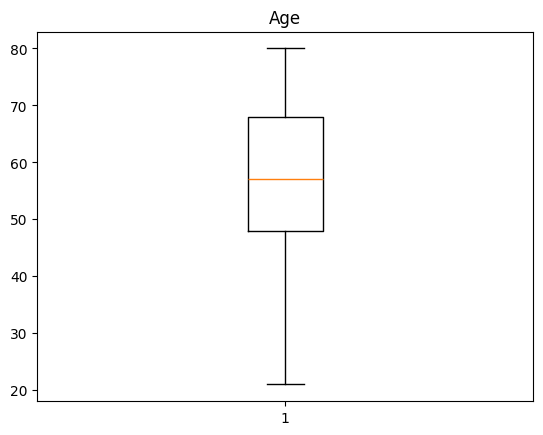

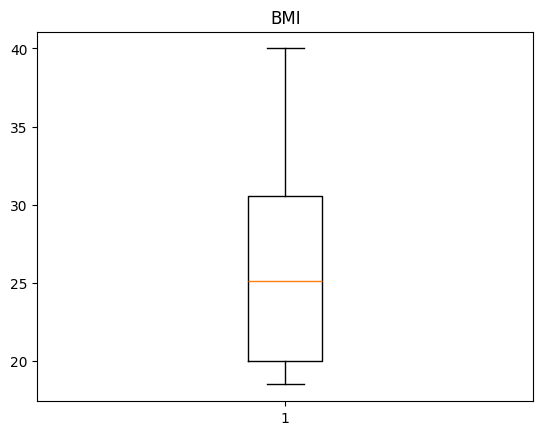

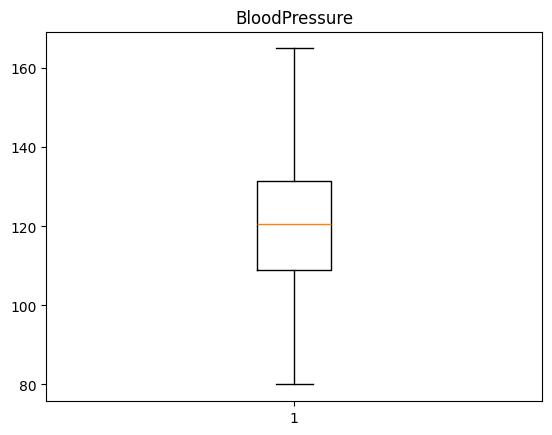

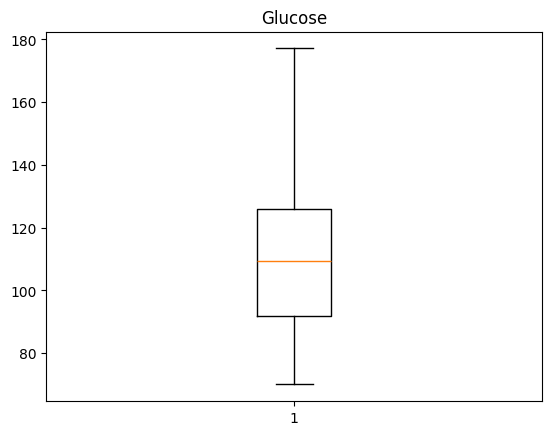

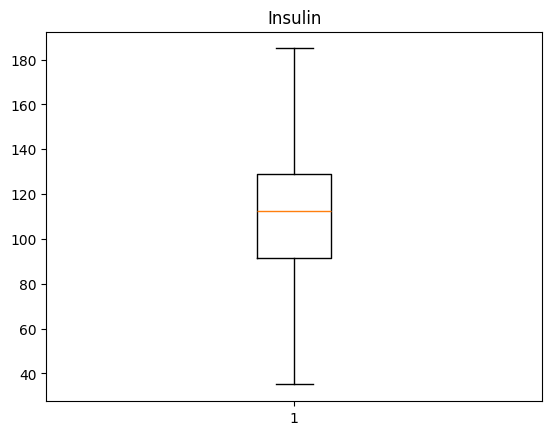

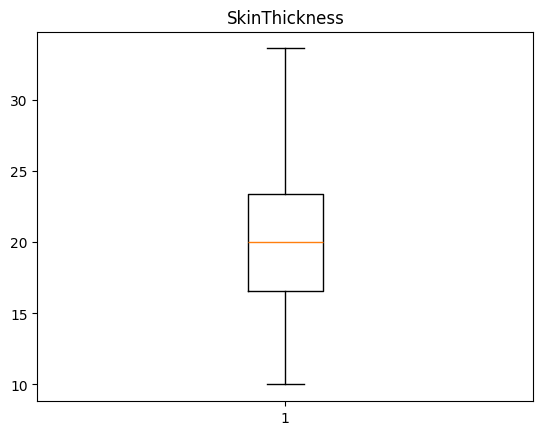

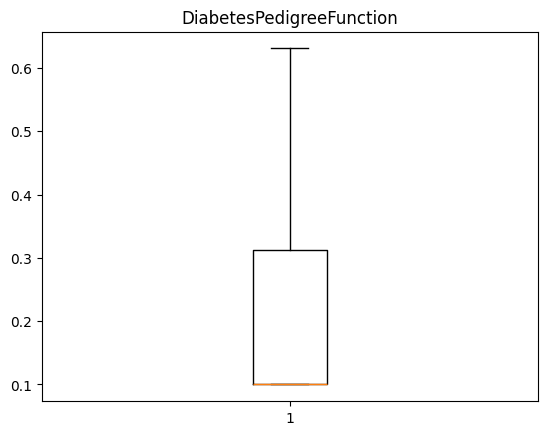

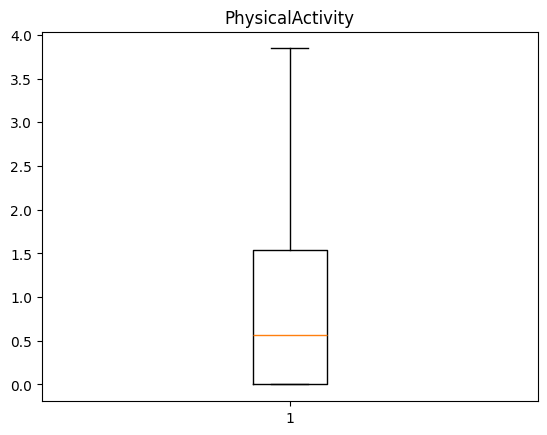

In [7]:
# Removing outliers (if any)
def lower_fence(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    lf = q1-(1.5*IQR)
    return lf
def upper_fence(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    uf = q3+(1.5*IQR)
    return uf
df1 = df.drop(columns = "Diabetes")
for i in df1.columns:
    df[i] = np.where(df[i]>upper_fence(df[i]),upper_fence(df[i]),df[i])
    df[i] = np.where(df[i]<lower_fence(df[i]),lower_fence(df[i]),df[i])
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

# Visualization of Relationships Between Columns

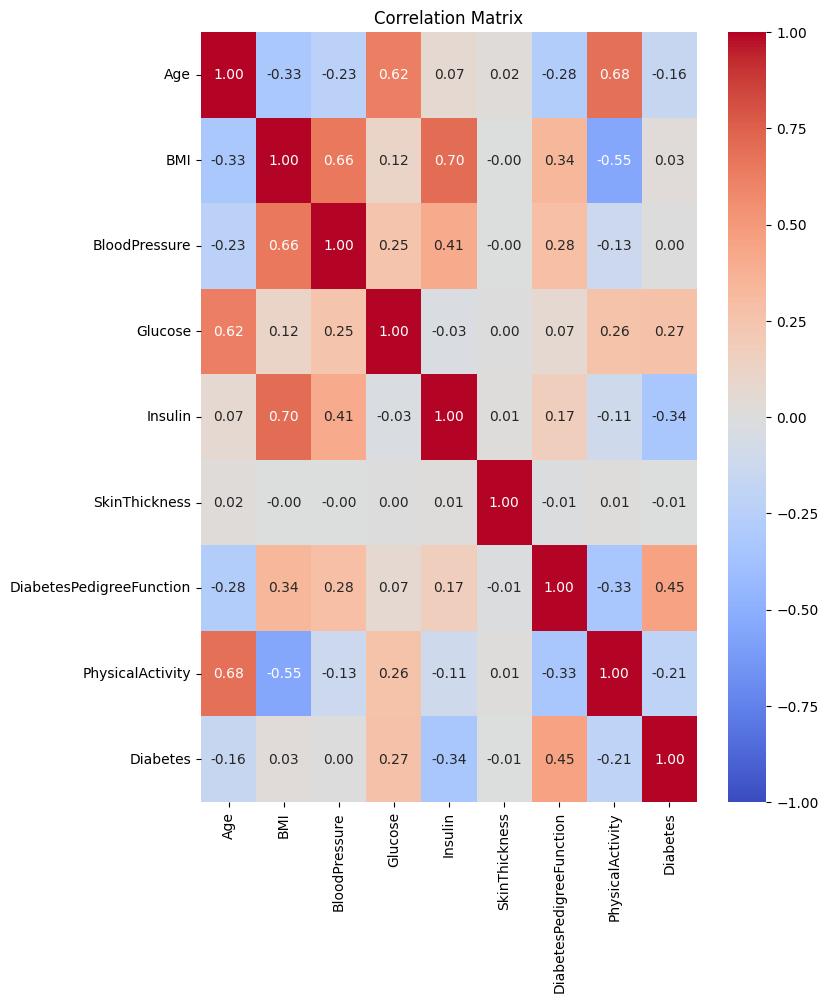

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(8,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [9]:
df.columns

Index(['Age', 'BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness',
       'DiabetesPedigreeFunction', 'PhysicalActivity', 'Diabetes'],
      dtype='object')

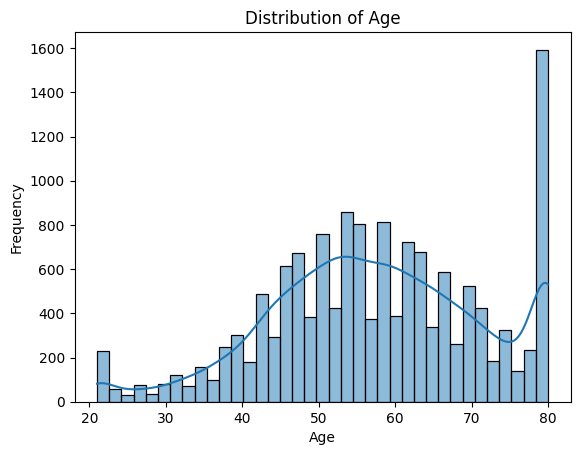

In [10]:
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

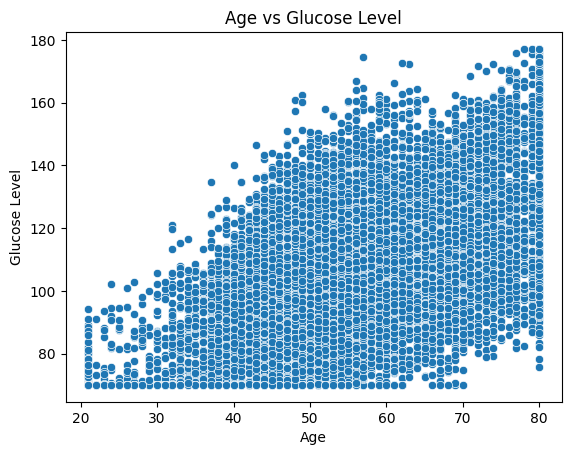

In [11]:
# Scatter Plot for Age vs Glucose
sns.scatterplot(data=df, x='Age', y='Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.title('Age vs Glucose Level')
plt.show()


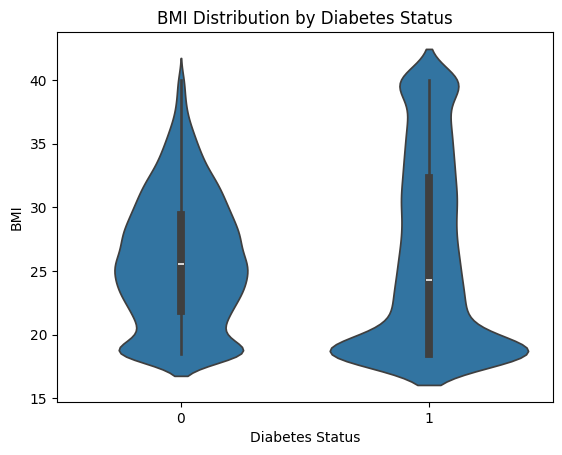

In [12]:
# Violin Plot for BMI by Diabetes status
sns.violinplot(data=df, x='Diabetes', y='BMI')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.title('BMI Distribution by Diabetes Status')
plt.show()


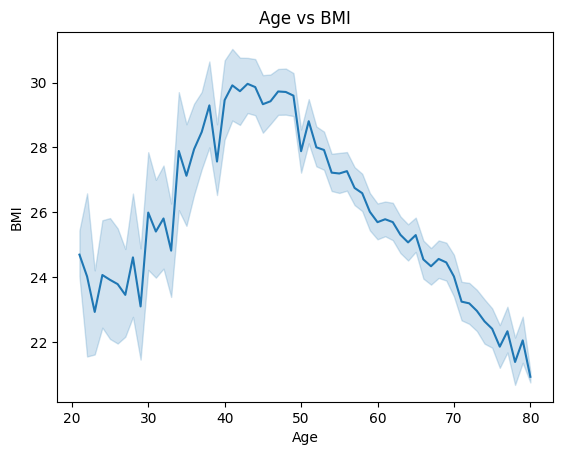

In [13]:
# Line Plot for Age vs BMI
sns.lineplot(data=df, x='Age', y='BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()


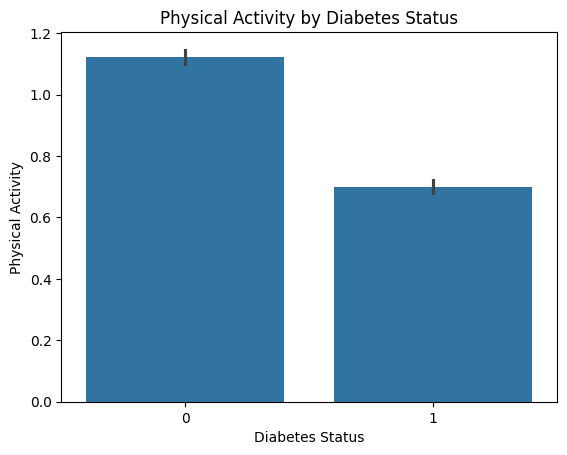

In [14]:
# Bar Plot for Physical Activity by Diabetes status
sns.barplot(data=df, x='Diabetes', y='PhysicalActivity')
plt.xlabel('Diabetes Status')
plt.ylabel('Physical Activity')
plt.title('Physical Activity by Diabetes Status')
plt.show()


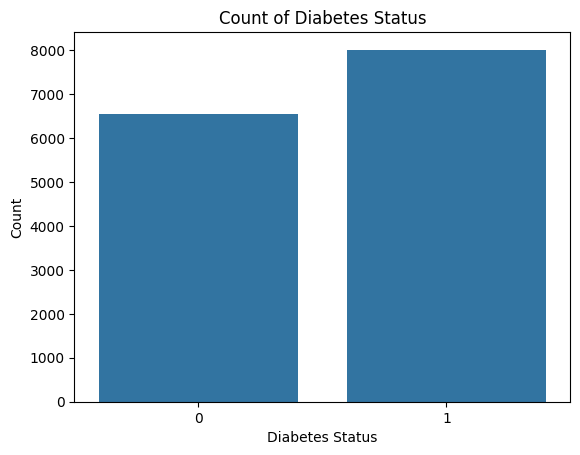

In [15]:
# Count Plot for Diabetes status
sns.countplot(data=df, x='Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Diabetes Status')
plt.show()


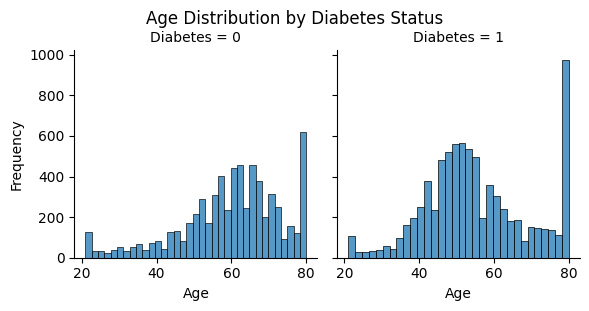

In [16]:
# Facet Grid for Age distribution by Diabetes status
g = sns.FacetGrid(df, col='Diabetes')
g.map(sns.histplot, 'Age')
g.set_axis_labels('Age', 'Frequency')
g.fig.suptitle('Age Distribution by Diabetes Status', y=1.02)
plt.show()


In [17]:
df['Diabetes'].value_counts()

Diabetes
1    8011
0    6556
Name: count, dtype: int64

In [18]:
y = df['Diabetes']
x = df.drop(columns='Diabetes')

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)

# Using Logistic Regression

In [20]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [21]:
print("Train accuracy:", log.score(x_train, y_train))
print("Test accuracy:", log.score(x_test, y_test))

Train accuracy: 0.8488801167081438
Test accuracy: 0.8541523678792038


In [22]:
print(metrics.classification_report(y_train, log.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      5282
           1       0.86      0.86      0.86      6371

    accuracy                           0.85     11653
   macro avg       0.85      0.85      0.85     11653
weighted avg       0.85      0.85      0.85     11653

********************************************************************
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1274
           1       0.88      0.86      0.87      1640

    accuracy                           0.85      2914
   macro avg       0.85      0.85      0.85      2914
weighted avg       0.86      0.85      0.85      2914



# Using Decision Tree

In [23]:
dt = DecisionTreeClassifier(max_depth = 10,
                            min_samples_split = 50,
                            min_samples_leaf = 1,
                            random_state = 88)

In [24]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50, random_state=88)

In [25]:
print("Train accuracy:", dt.score(x_train, y_train))
print("Test accuracy:", dt.score(x_test, y_test))

Train accuracy: 0.9497125203810177
Test accuracy: 0.9385724090597117


In [26]:
print(metrics.classification_report(y_train, dt.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5282
           1       0.95      0.96      0.95      6371

    accuracy                           0.95     11653
   macro avg       0.95      0.95      0.95     11653
weighted avg       0.95      0.95      0.95     11653

********************************************************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1274
           1       0.95      0.95      0.95      1640

    accuracy                           0.94      2914
   macro avg       0.94      0.94      0.94      2914
weighted avg       0.94      0.94      0.94      2914



# Using Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators=200,
                           criterion='gini',
                           max_depth=10,
                           min_samples_split=7,
                           min_samples_leaf=1,
                           random_state=88)

In [28]:
rm.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=200,
                       random_state=88)

In [29]:
print("Train accuracy:", rm.score(x_train, y_train))
print("Test accuracy:", rm.score(x_test, y_test))

Train accuracy: 0.9646442976057668
Test accuracy: 0.9584763212079616


In [30]:
print(metrics.classification_report(y_train, rm.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5282
           1       0.96      0.98      0.97      6371

    accuracy                           0.96     11653
   macro avg       0.97      0.96      0.96     11653
weighted avg       0.96      0.96      0.96     11653

********************************************************************
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1274
           1       0.95      0.97      0.96      1640

    accuracy                           0.96      2914
   macro avg       0.96      0.96      0.96      2914
weighted avg       0.96      0.96      0.96      2914



# Using KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [32]:
print("Train acuraccy ",knn.score(x_train,y_train))
print("Test acuraccy ",knn.score(x_test,y_test))

Train acuraccy  0.9456792242341028
Test acuraccy  0.938229238160604


In [33]:
print(metrics.classification_report(y_train,knn.predict(x_train)))
print("********************************************************************")
print(metrics.classification_report(y_test, rm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5282
           1       0.95      0.95      0.95      6371

    accuracy                           0.95     11653
   macro avg       0.95      0.95      0.95     11653
weighted avg       0.95      0.95      0.95     11653

********************************************************************
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1274
           1       0.95      0.97      0.96      1640

    accuracy                           0.96      2914
   macro avg       0.96      0.96      0.96      2914
weighted avg       0.96      0.96      0.96      2914

